In [5]:
import json
import random
import re
# Имортируем модуль regex, чтобы можно было использовать регулярное выражение для поиска эмодзи "\p{Emoji}"
import regex

In [6]:
# Загрузка данных
with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)
print(data.keys())
print(data['messages'][0].keys())

dict_keys(['name', 'type', 'id', 'messages'])
dict_keys(['id', 'type', 'date', 'date_unixtime', 'actor', 'actor_id', 'action', 'title', 'text', 'text_entities'])


In [8]:
texts=[]
for m in data['messages']:
  if isinstance(m['text'],list):
    for i in m["text"]:
      if isinstance(i,str):
        texts.append(i)
  elif not m["text"] == "":
    texts.append(m["text"])

# Результат вывести случайные 10 текстов первые 100 символов
sample_texts=random.sample(texts, 10)
for j in sample_texts:
  print("---------------------------\n",j[:100])

---------------------------
 , Германия.
Этот причудливый ландшафт образовался ближе к концу последнего ледникового периода, окол
---------------------------
 Горный фазан-павлин, также известный как Зеркальный фазан или фазан-павлин Ротшильда, является видом
---------------------------
 подписчики ждут посты
---------------------------
 
---------------------------
 Ну вот беседа заходите кто хочет 


---------------------------
 Абрикосовая долина Йили, Китай.
Ежегодно покатые склоны Синьцзян покрываются пышной пеной розовато-б
---------------------------
  — это разновидность тропического циклона, которая типична для северо-запада Тихого океана. Тайфунам
---------------------------
  — один из самых яркоокрашенных видов ласточек, населяющий полуоткрытые районы в западной части Севе
---------------------------
  из семейства гвоздичных) – остров Локвуд, который находится в Канадском Арктическом архипелаге – 83
---------------------------
  — это крупная бабочка семейства бражников, р

1. Улучшить очистку данных

  - добавить удаление знаков препинания
  - добавить удаление слов, написанных латиницей


In [10]:
cleaned_text=[]
for i in sample_texts:
  #                               знаки препинания            хэштеги и ссылки       латиница  эмодзи  перенос строки
  cleaned_text.append(regex.sub(r'[.,…!?;:—\-"\'«»„“()\[\]{}]|[@#]\S+|https?:\/\/\S+|[a-zA-Z]|\p{Emoji}|[\n]', " ", i))
print(cleaned_text)
#sample_texts_clean=random.sample(cleaned_text, 10)

['  Германия  Этот причудливый ландшафт образовался ближе к концу последнего ледникового периода  около        лет назад  в результате одного или нескольких обвалов горных пород ', 'Горный фазан павлин  также известный как Зеркальный фазан или фазан павлин Ротшильда  является видом фазанов  эндемичным для горных лесов центрального Малайского полуострова  Это представитель семейства павлино фазановых  которое состоит из группы фазанов  обладающих заметными круглыми пятнами в форме глаз на оперении ', 'подписчики ждут посты', '', 'Ну вот беседа заходите кто хочет   ', 'Абрикосовая долина Йили  Китай  Ежегодно покатые склоны Синьцзян покрываются пышной пеной розовато белого цветения абрикосовых деревьев  появление цветов знаменует начало сезона урожая фруктов ', '   это разновидность тропического циклона  которая типична для северо запада Тихого океана  Тайфунам присваивают имена  чтобы упростить их идентификацию при прогнозировании погоды и предупреждении об опасности   Тайфуны сопровожд

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Удаление слов, написанных латиницей
stop_words = set(stopwords.words("english"))
cleaned_words=[]
for text in cleaned_text:
  for i in text.split():
    if not i.lower() in stop_words:
      cleaned_words.append(i)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
!python3 -m spacy download ru_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


2. Лемматизировать текст

In [15]:
import spacy

text = " ".join(cleaned_text)

nlp = spacy.load("ru_core_news_sm")

doc = nlp(text )
text_tokens=[]
# Лемматизация
for token in doc:
  lemma = token.lemma_
  if not token.is_space:
    text_tokens.append(lemma)



3. Создать частотный словарь лемм с помощью Counter

In [16]:
from collections import Counter
import matplotlib.pyplot as plt
from itertools import islice

# Отсортировать частотность лемм по убыванию, взять первые 20 элементов
lemma_counts = dict(islice(dict(Counter(text_tokens).most_common()).items(), 20))


4. Построить гистограмму 20 наиболее частотных лемм

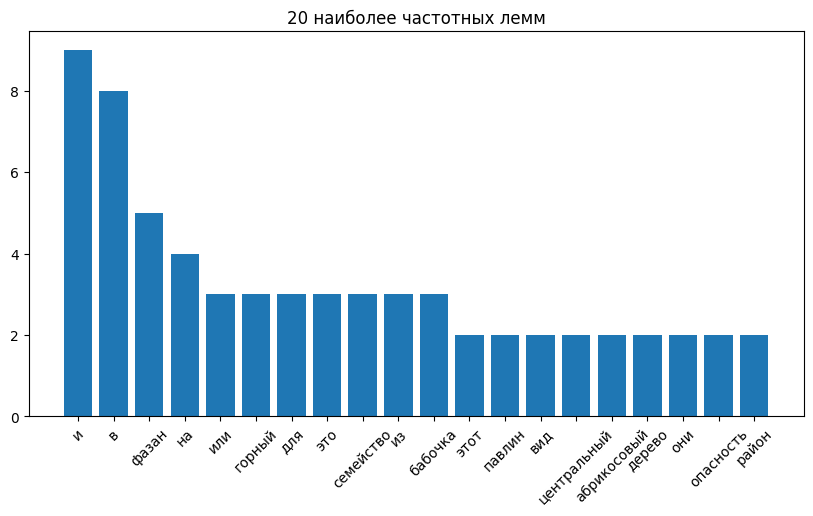

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(lemma_counts.keys(), lemma_counts.values())
plt.xticks(rotation=45)
plt.title("20 наиболее частотных лемм")
plt.show()

5. С помощью random.sample выбрать случайный текст из нашей выборки: если в этом тексте есть именованные сущности (найдите их с помощью spacy), сделать визуализацию разметки с помощью displacy

In [18]:
entities = []
for txt in cleaned_text:
    doc = nlp(txt)
    # print(doc)
    # Добавляем метку сущности в список
    entities.extend([ent.label_ for ent in doc.ents])
if len(entities)>0:
  doc = nlp(" ".join(cleaned_text))
  spacy.displacy.serve(doc, style="ent")
else:
  print("В тексте нет именованных сущностей!")

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
